In [175]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [176]:
interactiondata = pd.read_csv('../data/interactiondata.csv')
userdata = pd.read_csv('../data/userdata.csv')

df = pd.merge(interactiondata, userdata, on='userid')
df.head()

df['join_datetime'] = pd.to_datetime(df['join_datetime'])

df['join_date'] = df['join_datetime'].dt.date


In [177]:
df["orders_num"] = np.zeros(df.shape[0])

orders = pd.read_csv('../data/orderdata.csv')
for i in range(orders.shape[0]):
    user_id = orders['userid'][i]
    df.loc[df['userid'] == user_id, 'orders_num'] += 1
    
df.head(5)

,userid,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,marketing_company_outcome_5,join_datetime,age,income,kids,teenagers,marital,education,join_date,orders_num
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,...,0,2023-07-04 21:54:35,66,64898.0,0,1,dating,bachelor,2023-07-04,7.0
1,3146a104-ede9-4cbb-8869-b65cf60a35d0,0,2024-05-17,2,0,0,2,5,3,1,...,0,2023-11-05 11:51:55,16,26539.0,0,0,single,NaN,2023-11-05,7.0
2,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,0,2023-01-20 11:28:47,49,84705.0,0,1,single,phd,2023-01-20,7.0
3,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,1,2023-03-06 19:30:28,11,25969.0,0,0,single,masters,2023-03-06,7.0
4,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,1,2024-01-21 05:56:36,16,25793.0,0,0,single,basic,2024-01-21,7.0


In [178]:
# Добавление новых столбцов в df_corr для расчета корреляции
df_corr = pd.DataFrame({
    'income': df['income'],
    'discount_purchases_count_avg': df['discount_purchases_count_avg'],
    'catalogue_purchases_count_avg': df['catalogue_purchases_count_avg'],
    'store_purchases_count_avg': df['store_purchases_count_avg'],
    'website_purchases_count_avg': df['website_purchases_count_avg'],
    'website_visit_count_avg': df['website_visit_count_avg'],
    'mobile_purchases_count_avg': df['mobile_purchases_count_avg'],
    'mobile_visit_count_avg': df['mobile_visit_count_avg']
})

correlation_matrix

,income,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg
income,1.000000,0.085569,0.642316,0.709605,0.504327,0.004781,0.290571,0.066671
discount_purchases_count_avg,0.085569,1.000000,0.073234,0.004353,0.071357,0.573017,0.560767,0.652266
catalogue_purchases_count_avg,0.642316,0.073234,1.000000,0.616262,0.459101,-0.101858,0.184533,0.068489
store_purchases_count_avg,0.709605,0.004353,0.616262,1.000000,0.574633,-0.103763,0.147675,-0.064692
website_purchases_count_avg,0.504327,0.071357,0.459101,0.574633,1.000000,0.047241,0.131071,-0.038241
website_visit_count_avg,0.004781,0.573017,-0.101858,-0.103763,0.047241,1.000000,0.558963,0.561906
mobile_purchases_count_avg,0.290571,0.560767,0.184533,0.147675,0.131071,0.558963,1.000000,0.773812
mobile_visit_count_avg,0.066671,0.652266,0.068489,-0.064692,-0.038241,0.561906,0.773812,1.000000


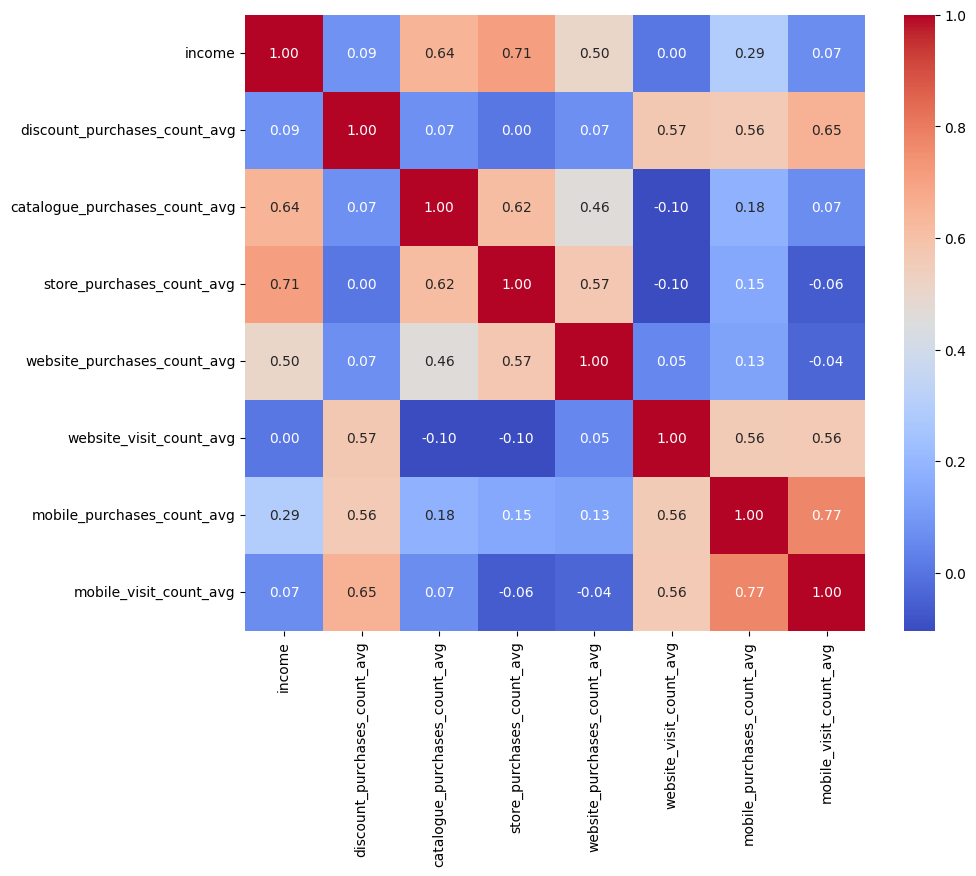

In [179]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [180]:
columns = df_corr.columns

for i in range(len(columns)):
    for j in range(len(columns)):
        if i != j:
            X = df_corr[columns[i]].values.reshape(-1, 1)
            Y = df_corr[columns[j]]

            model = LinearRegression()
            model.fit(X, Y)

            score = model.score(X, Y)  # R^2

            print(f'R^2 score for {columns[i]} vs {columns[j]}: {score:.4f}')

R^2 score for income vs discount_purchases_count_avg: 0.0073
R^2 score for income vs catalogue_purchases_count_avg: 0.4126
R^2 score for income vs store_purchases_count_avg: 0.5035
R^2 score for income vs website_purchases_count_avg: 0.2543
R^2 score for income vs website_visit_count_avg: 0.0000
R^2 score for income vs mobile_purchases_count_avg: 0.0844
R^2 score for income vs mobile_visit_count_avg: 0.0044
R^2 score for discount_purchases_count_avg vs income: 0.0073
R^2 score for discount_purchases_count_avg vs catalogue_purchases_count_avg: 0.0054
R^2 score for discount_purchases_count_avg vs store_purchases_count_avg: 0.0000
R^2 score for discount_purchases_count_avg vs website_purchases_count_avg: 0.0051
R^2 score for discount_purchases_count_avg vs website_visit_count_avg: 0.3283
R^2 score for discount_purchases_count_avg vs mobile_purchases_count_avg: 0.3145
R^2 score for discount_purchases_count_avg vs mobile_visit_count_avg: 0.4255
R^2 score for catalogue_purchases_count_avg vs

last_order_dt
2024-05-11     29
2024-05-12     25
2024-05-13     27
2024-05-14     30
2024-05-15     30
2024-05-16     26
2024-05-17     35
2024-05-18     35
2024-05-19     28
2024-05-20     29
2024-05-21     26
2024-05-22     28
2024-05-23     24
2024-05-24     18
2024-05-25     22
2024-05-26     27
2024-05-27     31
2024-05-28     24
2024-05-29     29
2024-05-30     22
2024-05-31     29
2024-06-01     28
2024-06-02     33
2024-06-03     28
2024-06-04     23
2024-06-05     33
2024-06-06     35
2024-06-07     32
2024-06-08     28
2024-06-09     34
2024-06-10     30
2024-06-11     28
2024-06-12     28
2024-06-13     24
2024-06-14     27
2024-06-15     33
2024-06-16     37
2024-06-17     21
2024-06-18     36
2024-06-19     28
2024-06-20     28
2024-06-21     27
2024-06-22     25
2024-06-23     26
2024-06-24     30
2024-06-25    149
2024-06-26    156
2024-06-27    155
2024-06-28    144
2024-06-29    134
2024-06-30    158
2024-07-01    161
2024-07-02    173
2024-07-03    148
2024-07-04    

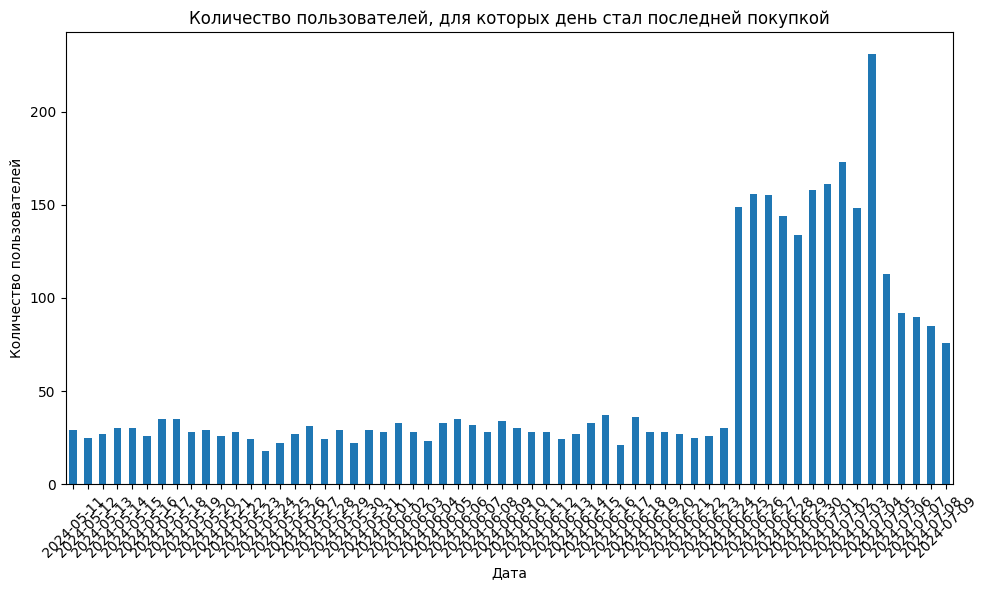

In [181]:
data_for_plot = df.groupby('last_order_dt').size()

print(data_for_plot)

plt.figure(figsize=(10, 6))
data_for_plot.plot(kind='bar')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей, для которых день стал последней покупкой')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 30 июня

join_date
2022-05-01    13
2022-05-08    18
2022-05-15    18
2022-05-22    29
2022-05-29    24
              ..
2024-05-12    36
2024-05-19    33
2024-05-26    31
2024-06-02    26
2024-06-09    17
Freq: W-SUN, Length: 111, dtype: int64


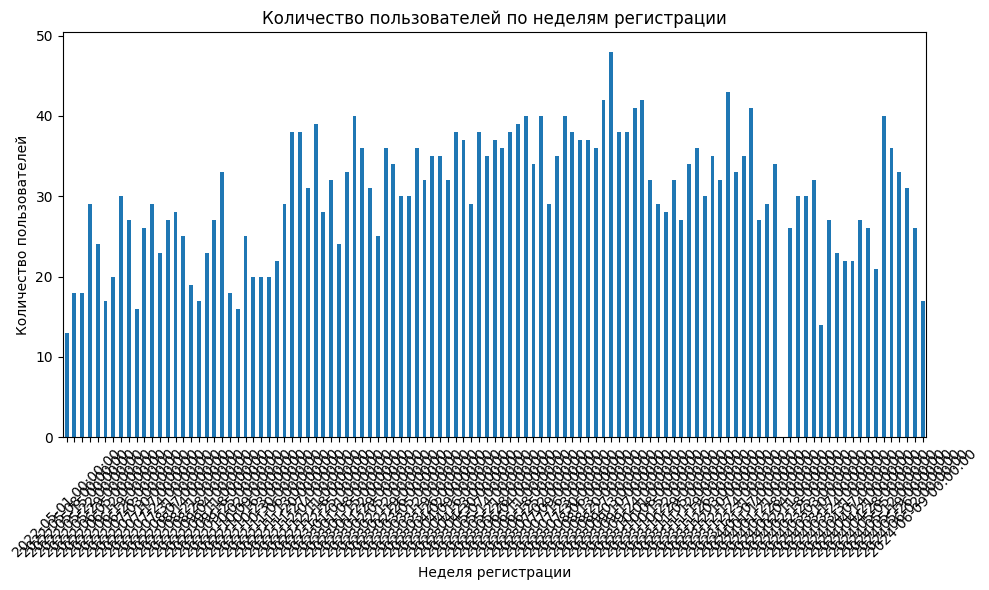

In [196]:
df['join_date'] = pd.to_datetime(df['join_date'])
data_for_plot = df.groupby(pd.Grouper(key='join_date', freq='W')).size()

print(data_for_plot)

plt.figure(figsize=(10, 6))
data_for_plot.plot(kind='bar')
plt.xlabel('Неделя регистрации')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей по неделям регистрации')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [183]:
# Для каждого пользвоателя найдем частоту покупок
df['last_order_dt'] = pd.to_datetime(df['last_order_dt'])
df['join_datetime'] = pd.to_datetime(df['join_datetime'])

df['frequency'] = round((df['last_order_dt'] - df['join_datetime']).dt.days / df['orders_num'])
df.head(20)

,userid,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,join_datetime,age,income,kids,teenagers,marital,education,join_date,orders_num,frequency
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,...,2023-07-04 21:54:35,66,64898.0,0,1,dating,bachelor,2023-07-04,7.0,50.0
1,3146a104-ede9-4cbb-8869-b65cf60a35d0,0,2024-05-17,2,0,0,2,5,3,1,...,2023-11-05 11:51:55,16,26539.0,0,0,single,NaN,2023-11-05,7.0,28.0
2,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,2023-01-20 11:28:47,49,84705.0,0,1,single,phd,2023-01-20,7.0,70.0
3,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,2023-03-06 19:30:28,11,25969.0,0,0,single,masters,2023-03-06,7.0,65.0
4,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,2024-01-21 05:56:36,16,25793.0,0,0,single,basic,2024-01-21,7.0,23.0
5,38c84b62-8717-4918-bb1a-53957d14ca81,0,2024-05-25,2,0,3,2,8,9,16,...,2022-07-31 22:26:39,37,47010.0,1,0,dating,bachelor,2022-07-31,7.0,95.0
6,02448415-4639-4db9-a5f2-796e85fafc8e,2,2024-06-27,1,0,0,0,4,2,33,...,2022-09-04 17:55:26,14,26559.0,0,0,single,masters,2022-09-04,7.0,94.0
7,19742c01-82da-4fe9-8770-131707627390,0,2024-05-17,1,0,1,0,4,0,41,...,2024-01-15 06:33:08,11,25565.0,0,0,single,bachelor,2024-01-15,7.0,17.0
8,a1d274f0-03b7-4b39-92a5-3dcbca946a0b,0,2024-05-17,5,3,3,3,6,7,12,...,2023-03-22 04:04:10,68,59074.0,1,1,dating,bachelor,2023-03-22,7.0,60.0
9,fbf550fd-58e4-44d4-9c6c-214a18a64349,0,2024-06-04,4,0,4,2,5,2,3,...,2022-07-03 21:59:18,56,43701.0,1,1,single,bachelor,2022-07-03,7.0,100.0


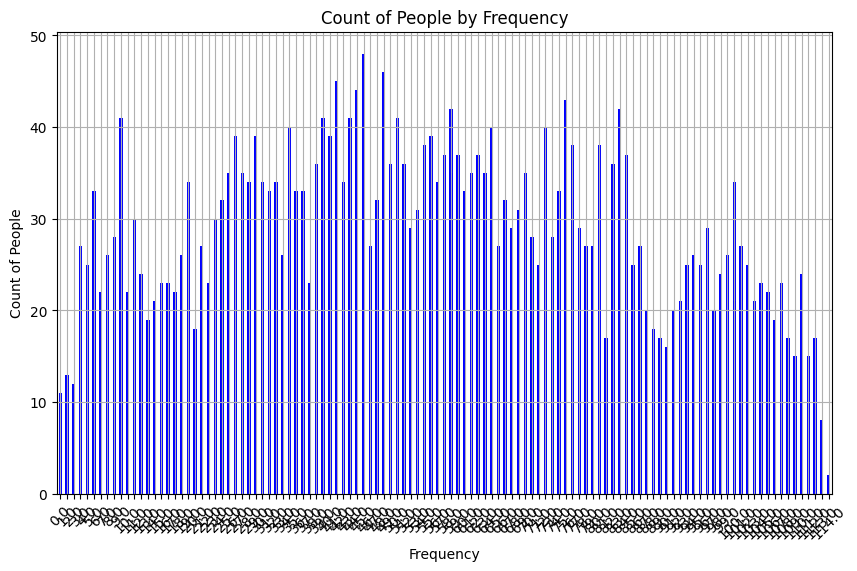

In [189]:
def exponential_smoothing(data, alpha=0.3):
    smoothed_data = [data[0]]  # Initialize with the first data point
    for i in range(1, len(data)):
        smoothed_value = alpha * data[i] + (1 - alpha) * smoothed_data[i-1]
        smoothed_data.append(smoothed_value)
    return pd.Series(smoothed_data)

df = df[df['frequency'] >= 0]
frequency_counts = df.groupby('frequency').size()
# Plot
plt.figure(figsize=(10, 6))
frequency_counts.plot(kind='bar', color='b')

plt.title('Count of People by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count of People')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [190]:
from scipy.stats import shapiro

# Assuming frequency_counts is already defined as shown in your code
stat, p = shapiro(frequency_counts)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.988, p=0.413
Sample looks Gaussian (fail to reject H0)
